# Import Necessary Libraries 

In [66]:
import pandas as pd
import os

#Get Current Working Directory
os.getcwd()

#Change Working Directory
os.chdir('C:/Users/User/Documents/Data Science Texas Tech')
os.getcwd()

'C:\\Users\\User\\Documents\\Data Science Texas Tech'

# Task 1: Merging 12 months of sales data into a single file

In [67]:
path = 'C:/Users/User/Documents/Data Science Texas Tech/Sales Analysis/SalesAnalysis/Sales_Data/'

files = [file for file in os.listdir(path)]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv(path + file)
    all_months_data = pd.concat([all_months_data, df])
   
#Checking out the data
all_months_data.head()




,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [68]:
#Shape of the dataset
all_months_data.shape



(186850, 6)

In [69]:
#how many nulls values
all_months_data.isnull().sum()



Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [70]:
#save the file to csv
all_months_data.to_csv("all_data.csv", index = False)

# Read In Update DataFrame


In [71]:
all_data = pd.read_csv("all_data.csv")
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Clean Up Data

### *Drop Rows With NaNs*

In [72]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how='all')
all_data.head(50)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215"


### *Convert Columns To The Right Data Type*

In [73]:
#all_data = all_data[all_data['Quantity Ordered'].str[0:35] != 'Quantity Ordered']
all_data = all_data[all_data['Price Each'].str[0:35] != 'Price Each']
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

#all_data[all_data['Order ID'].str[0:35] == 'Order ID']


#all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
#all_data['Price Each'].loc[514:]

In [74]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### *Find 'Or' and Delete It*

In [75]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.shape

(185950, 6)

## Augment Data With Additional Columns

# Task 2: Add Month Column

In [76]:
all_data['Month']=all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


## Task 3: Add a sales column

In [77]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

all_data =all_data[['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Sales', 'Month', 'Order Date', 'Purchase Address']]

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Month,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,23.90,4,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,99.99,4,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,600.00,4,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,11.99,4,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,11.99,4,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### Task 4: Add a City Column

In [78]:
#Using the .apply() method to extract 'City' From Purchase Address

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x) + ')')

#all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Month,Order Date,Purchase Address,City
0,176558,USB-C Charging Cable,2,11.95,23.90,4,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,99.99,4,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Boston (MA)
3,176560,Google Phone,1,600.00,600.00,4,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,11.99,4,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,11.99,4,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA)


### Question 1: What was the best month for sales? How much was earned that month?

December was the best month in sales with total sales of $4,588,415

In [79]:
results = all_data.groupby('Month', sort = True).sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


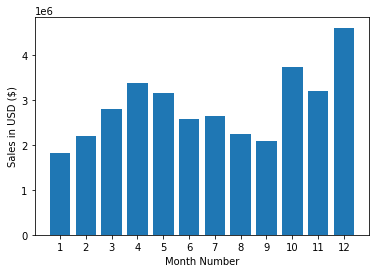

In [80]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.xlabel("Month Number")
plt.ylabel('Sales in USD ($)')
#plt.title('Mobile Phones & Accessories')
plt.show()

### Question 2: What City Sold the Most Product?

San Francisco sold the highest number of product with about $8,262,204 in sales

In [81]:
resultsCity = all_data.groupby(['City']).sum()
resultsCity

,Quantity Ordered,Price Each,Sales,Month
City,,,,
Atlanta (GA),16602,2.779908e+06,2.795499e+06,104794
Austin (TX),11153,1.809874e+06,1.819582e+06,69829
Boston (MA),22528,3.637410e+06,3.661642e+06,141112
Dallas (TX),16730,2.752628e+06,2.767975e+06,104620
Los Angeles (CA),33289,5.421435e+06,5.452571e+06,208325
New York City (NY),27932,4.635371e+06,4.664317e+06,175741
Portland (ME),2750,4.471893e+05,4.497583e+05,17144
Portland (OR),11303,1.860558e+06,1.870732e+06,70621
San Francisco (CA),50239,8.211462e+06,8.262204e+06,315520


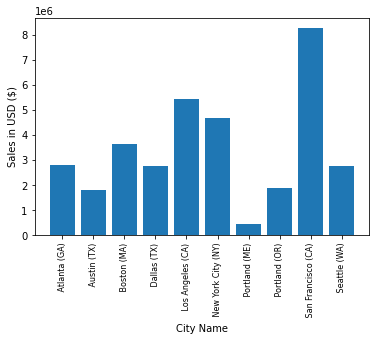

In [82]:
import matplotlib.pyplot as plt

cities = [city for city, df in all_data.groupby(['City'])]

plt.bar(cities, resultsCity['Sales'])
plt.xticks(cities, rotation = 'vertical', size=8)
plt.xlabel("City Name")
plt.ylabel('Sales in USD ($)')
#plt.title('Mobile Phones & Accessories')
plt.show()

### Question 3: What time should we display advertisements to maximize the likelihood of customer’s buying product?

From the graph below, 11am and 7pm seem to be the best times

In [83]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Month,Order Date,Purchase Address,City
0,176558,USB-C Charging Cable,2,11.95,23.90,4,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,99.99,4,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Boston (MA)
3,176560,Google Phone,1,600.00,600.00,4,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,11.99,4,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,11.99,4,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA)


In [84]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

### *Adding Hour & Minute Colums*

In [85]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Month,Order Date,Purchase Address,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,23.90,4,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,99.99,4,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston (MA),22,30
3,176560,Google Phone,1,600.00,600.00,4,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,11.99,4,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,11.99,4,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA),9,27


In [ ]:
hours = [hour for hour, df in all_data.groupby(['Hour'])]

plt.plot(hours, all_data.groupby(['Hour']).count())

plt.xticks(hours)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Number of Orders')

plt.show()

#all_data.groupby(['Hour']).count()

### Question 4: What products are most often sold together?

iPhone,Lightning Charging Cable are sold the most together

In [ ]:
#using duplicated function with Keep as False. Keep as False captures all duplicates
df = all_data[all_data['Order ID'].duplicated(keep=False)]

#Creating a new column to show items ordered together
df['Grouped'] = df.groupby(['Order ID'])['Product'].transform(lambda x: ','.join(x))

#drop duplicate Orders
df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head(25)


In [ ]:
#Get count of products ordered together

# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

### What product sold the most? Why do you think it sold the most?

batteries 


In [ ]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

product = [product for product, df in product_group]

plt.bar(product,quantity_ordered )
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')
plt.xticks(product, rotation = 'vertical', size = 10)

plt.show()

In [ ]:
prices =all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(product, quantity_ordered, color = 'g')
ax2.plot(product, prices, color = 'r')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color = 'g')
ax1.set_xticklabels(product, rotation = 'vertical', size = 10)
ax2.set_ylabel('Price, USD', color = 'r')

plt.show()